In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd


df = pd.read_csv("Operational_Risk_Analysis_Project2.csv")


df.head()


Saving Operational_Risk_Analysis_Project2.csv to Operational_Risk_Analysis_Project2 (1).csv


,Order ID,Category,Region,Dispatch Time (days),Delivery Time (days),Delay Risk (%),Return (Y/N),Return Reason,Product Price (₹),Refund Amount (₹)
0,O0001,Electronics,East,4,7,58,Y,Customer Cancelled,1104,1104
1,O0002,Apparel,North,1,6,68,Y,Late Delivery,1401,1401
2,O0003,Home & Kitchen,East,4,6,10,N,NaN,1739,0
3,O0004,Home & Kitchen,South,4,6,81,N,NaN,579,0
4,O0005,Electronics,North,3,7,64,N,NaN,1279,0


In [ ]:

df["Total Delay (days)"] = df["Delivery Time (days)"] - df["Dispatch Time (days)"]


df["Refund %"] = (df["Refund Amount (₹)"] / df["Product Price (₹)"]) * 100


df["High Risk Zone"] = df["Delay Risk (%)"].apply(lambda x: "Yes" if x > 70 else "No")


df.head()


,Order ID,Category,Region,Dispatch Time (days),Delivery Time (days),Delay Risk (%),Return (Y/N),Return Reason,Product Price (₹),Refund Amount (₹),Total Delay (days),Refund %,High Risk Zone
0,O0001,Electronics,East,4,7,58,Y,Customer Cancelled,1104,1104,3,100.0,No
1,O0002,Apparel,North,1,6,68,Y,Late Delivery,1401,1401,5,100.0,No
2,O0003,Home & Kitchen,East,4,6,10,N,NaN,1739,0,2,0.0,No
3,O0004,Home & Kitchen,South,4,6,81,N,NaN,579,0,2,0.0,Yes
4,O0005,Electronics,North,3,7,64,N,NaN,1279,0,4,0.0,No


In [ ]:

return_rate = df.groupby("Category")["Return (Y/N)"].value_counts(normalize=True).unstack().fillna(0)

return_rate["Return %"] = return_rate["Y"] * 100


return_rate[["Return %"]].sort_values("Return %", ascending=False)


Return (Y/N),Return %
Category,
Footwear,41.176471
Electronics,34.782609
Apparel,27.777778
Beauty,18.750000
Home & Kitchen,15.384615


In [ ]:

avg_delay = df.groupby("Region")["Total Delay (days)"].mean().sort_values(ascending=False)


avg_delay


,Total Delay (days)
Region,
South,3.142857
North,2.960000
West,2.952381
East,2.575758


In [ ]:

refund_loss = df.groupby("Region")["Refund Amount (₹)"].sum().sort_values(ascending=False)


refund_loss


,Refund Amount (₹)
Region,
North,10450
West,7156
East,6669
South,5904


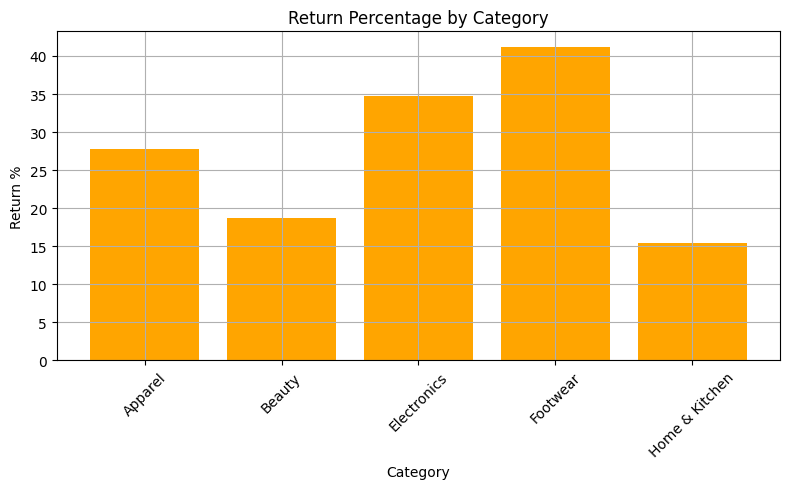

In [7]:
import matplotlib.pyplot as plt

# Bar chart for Return %
plt.figure(figsize=(8,5))
plt.bar(return_rate.index, return_rate["Return %"], color="orange")
plt.title("Return Percentage by Category")
plt.xlabel("Category")
plt.ylabel("Return %")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


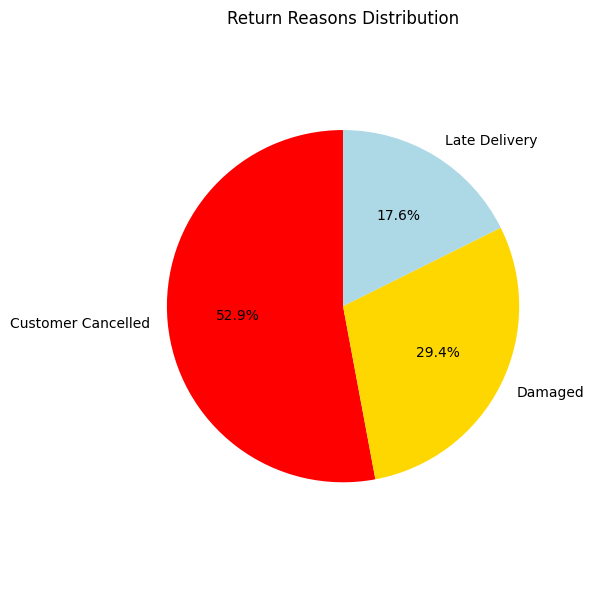

In [8]:
# Count of return reasons (excluding "None")
return_reason_counts = df[df["Return Reason"] != "None"]["Return Reason"].value_counts()

# Pie chart for Return Reasons
plt.figure(figsize=(6,6))
plt.pie(return_reason_counts, labels=return_reason_counts.index, autopct="%1.1f%%", startangle=90, colors=["red", "gold", "lightblue"])
plt.title("Return Reasons Distribution")
plt.axis("equal")
plt.tight_layout()
plt.show()


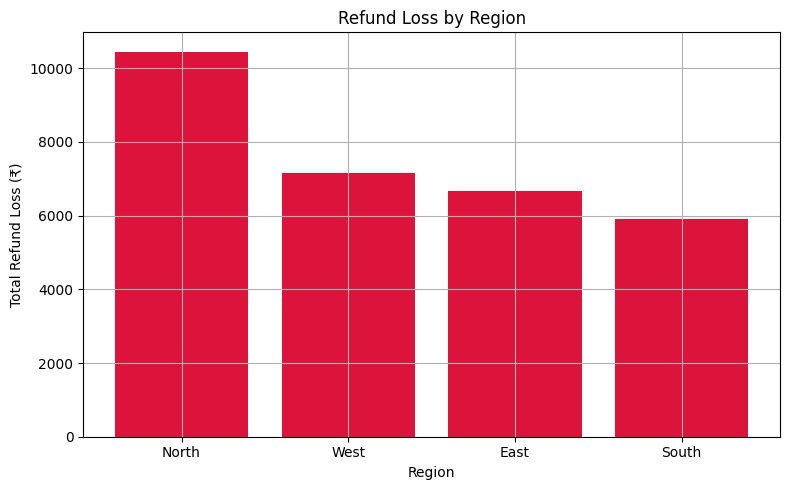

In [9]:
# Bar chart for Refund Loss by Region
plt.figure(figsize=(8,5))
plt.bar(refund_loss.index, refund_loss.values, color="crimson")
plt.title("Refund Loss by Region")
plt.xlabel("Region")
plt.ylabel("Total Refund Loss (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:

df.to_excel("Cleaned_Operational_Data.xlsx", index=False)


In [12]:
from google.colab import files
files.download("Cleaned_Operational_Data.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>